In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from tqdm import tqdm

import utils

In [2]:
RANDOM_SEED = 42

In [3]:
(x_train, y_train), (x_test, y_test) = utils.load_mnist_5()
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (60000, 784), y_train.shape = (60000,)
x_test.shape = (10000, 784), y_test.shape = (10000,)


In [4]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED)
sgd_clf.fit(x_train, y_train)

SGDClassifier(random_state=42)

In [5]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [6]:
def plot_roc(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate (Fall-Out)")
    plt.ylabel("True Positive Rate (Recall)")
    plt.grid(True)
    plt.show()

In [7]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print(f"fpr.shape = {fpr.shape}, tpr.shape = {tpr.shape}, thresholds.shape = {thresholds.shape}")

fpr.shape = (3908,), tpr.shape = (3908,), thresholds.shape = (3908,)


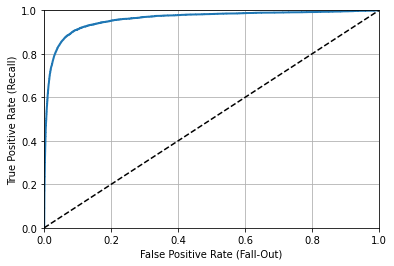

In [8]:
plot_roc(fpr, tpr)

In [9]:
auc = roc_auc_score(y_train, y_scores)
print(f"auc = {auc}")

auc = 0.9604938554008616


100%|██████████████████████████████████████████████████████████████████████████| 60000/60000 [00:51<00:00, 1159.88it/s]


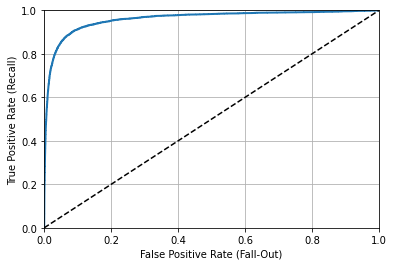

In [10]:
y_score_sorted = np.sort(y_scores)
true_positive_rates = np.zeros(len(y_score_sorted))
false_positive_rates = np.zeros(len(y_score_sorted))
for i, score in enumerate(tqdm(y_score_sorted)):
    y_preds = y_scores >= score
    true_positive = np.sum((y_train == True) & (y_preds == True))
    true_negative = np.sum((y_train == False) & (y_preds == False))
    false_positive = np.sum((y_train == False) & (y_preds == True))
    false_negative = np.sum((y_train == True) & (y_preds == False))
    true_positive_rates[i] = true_positive / (true_positive + false_negative)
    false_positive_rates[i] = false_positive / (true_negative + false_positive)
    
plot_roc(false_positive_rates, true_positive_rates)

In [11]:
dx = false_positive_rates[:-1] - false_positive_rates[1:]
y = (true_positive_rates[:-1] + true_positive_rates[1:]) / 2
auc = np.sum(np.multiply(dx, y))
print(f"auc = {auc}")

auc = 0.9604938554008616


In [ ]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train, cv=3, method='predict_proba')
print("y_probas_forest.shape = {y_probas_forest.shape}")

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

plot_roc(fpr_forest, tpr_forest)
auc = roc_auc_score(y_train, y_scores_forest)
print(f"auc = {auc}")